# Assignment 1

In [1]:
!pip install wordcloud

In [2]:
import re
import pandas as pd
import nltk
import numpy as np

In [3]:
nltk.download("stopwords")
nltk.download("words")
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gener\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\gener\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gener\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gener\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gener\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
df = pd.read_csv("A1_dataset.csv")

In [5]:
df.head()

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...


In [6]:
from customregexes import *

---

### II) Text Preprocessing

In [7]:
from nltk.tokenize import TweetTokenizer

def tokenization(text):
    twt_tk = TweetTokenizer()
    return twt_tk.tokenize(text)

In [8]:
# Can use Jaccard distance or edit distance to do this
from nltk.metrics.distance import jaccard_distance, edit_distance
from nltk.corpus import words

wrd = words.words()

# Spelling correction using jaccard distance
def spelling_correction_jaccard(text):
    res = []
    for curr in text:
        if curr not in wrd:
            crrct_words = []
            for w in wrd:
                crrct_words.append([jaccard_distance(set(w), set(curr)), w])
            crrct_words = sorted(crrct_words, key = lambda x: x[0])
            res.append(crrct_words[0][1][0])
        else:
            res.append(curr)
    return ' '.join(res)

# Spelling correction using edit distance
def spelling_correction_edit(text):
    res = []
    for curr in text:
        if curr not in wrd:
            crrct_words = []
            for w in wrd:
                crrct_words.append([edit_distance(w, curr), w])
            crrct_words = sorted(crrct_words, key = lambda x: x[0])
            res.append(crrct_words[0][1])
        else:
            res.append(curr)
    return ' '.join(res)

In [9]:
spelling_correction_jaccard(["helllo", "good"]), spelling_correction_edit(["helllo", "good"])

#As we can see from the results below that the corrected words we get using edit distance are
#far better than the ones we get from jaccard distance

('h good', 'hello good')

In [10]:
#Here we can either do lemmatization or stemming, doing both at the same time will not be useful

from nltk.stem import WordNetLemmatizer, PorterStemmer

def lemmatization_text(text):
    wn = WordNetLemmatizer()
    lemmatized_text = []
    for each in text:
        lemmatized_word = wn.lemmatize(each)
        lemmatized_text.append(lemmatized_word)
    return ' '.join(lemmatized_text)

def stemming_text(text):
    stemmed_text = []
    ps = PorterStemmer()
    for each in text:
        stemmed_word = ps.stem(each)
        stemmed_text.append(stemmed_word)
    return ' '.join(stemmed_text)

In [11]:
lemmatization_text(["dogs", "becomes"]), stemming_text(["dogs", "becomes"])

('dog becomes', 'dog becom')

In [12]:
import string

def remove_punctuations(text):
    puncts = string.punctuation
    return ''.join(re.split("[" + puncts + "]", text))

In [13]:
print("Punctuations: ", string.punctuation)
remove_punctuations("lesgoooo!!!!!?!??!! whooohooo!")

Punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'lesgoooo whooohooo'

In [14]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    pattern = re.compile(r'\b(' + (r'|'.join(stopwords.words("english"))) + r')\b\s*')
    return pattern.sub('', text)

In [15]:
remove_stopwords("the is when am i the when the when name is")

'name '

In [16]:
def remove_whitespaces(text):
    return re.sub(r'\s*\s', ' ', text)

In [17]:
remove_whitespaces("whoa a    s f")

'whoa a s f'

In [18]:
def remove_url_html(text):
    text = text.lower()
    urls = findURLs(text)
    text = re.sub('(' + "|".join(urls) + ')', '', text)
    return text

In [19]:
remove_url_html('Something so beautiful I want to share with my tweeter friends  http://www.spiritisup.com/ahuginyourinboxgmb.html')

'something so beautiful i want to share with my tweeter friends  '

---

### III) Visualization

In [55]:
# Here we prefer to perform lemmatization over stemming so that the words don't lose their inherent meaning
# and we perform spelling correction using the edit_distance metric in nltk, this is mainly because of the results shown above
# comparing the jaccard distance and the edit distance method.

def preprocess_text(text):
    text = remove_url_html(text)
    text = remove_punctuations(text)
    text = remove_whitespaces(text)
#     text = spelling_correction_edit(text)
    text = remove_stopwords(text)
    text = tokenization(text)
    text = lemmatization_text(text)
    return text

In [56]:
df["PREPROCESSED_TEXT"] = df["TEXT"].apply(lambda row: preprocess_text(row))

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#### a) Word Clouds of both classes

In [67]:
positive_preprocessed_text = df["PREPROCESSED_TEXT"][df.LABEL==1]
negative_preprocessed_text = df["PREPROCESSED_TEXT"][df.LABEL==0]

In [68]:
positive_preprocessed_text = ' '.join(positive_preprocessed_text.values)

In [70]:
wordcloud = WordCloud(width = 1500, height = 720,
                background_color ='black',
                min_font_size = 10).generate(positive_preprocessed_text)

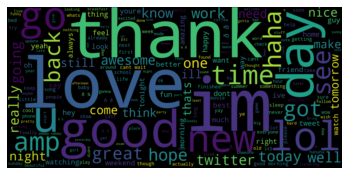

In [71]:
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [72]:
negative_preprocessed_text = ' '.join(negative_preprocessed_text.values)

In [73]:
wordcloud = WordCloud(width = 1500, height = 720,
                background_color ='black',
                min_font_size = 10).generate(negative_preprocessed_text)

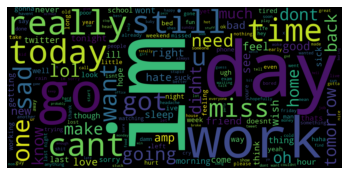

In [74]:
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

#### b) Comparing both Word Clouds

---

### IV) Rule-Based Sentiment Analysis

In [75]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#### a) Retrieving Class Label for every instance

In [76]:
sid = SentimentIntensityAnalyzer()

In [77]:
def retrieve_label(y_pred):
    label = int(y_pred["pos"] >= y_pred["neg"])
    return label

##### i) On preprocessed text

In [79]:
prptext_labels = []
for each_text in df["PREPROCESSED_TEXT"].values:
    sentiment_pred = sid.polarity_scores(each_text)
    prptext_labels.append(retrieve_label(sentiment_pred))
prptext_labels = np.array(prptext_labels)

##### ii) On raw text

In [80]:
rawtxt_labels = []
for each_text in df["TEXT"].values:
    sentiment_pred = sid.polarity_scores(each_text)
    rawtxt_labels.append(retrieve_label(sentiment_pred))
rawtxt_labels = np.array(rawtxt_labels)

#### b) Get accuracy scores

In [81]:
y = df["LABEL"].values

In [82]:
def get_accuracy(y_preds, y):
    no_instances = len(y)
    return sum(y_preds==y)/no_instances

##### i) Of preprocessed text

In [83]:
print("The accuracy score of labels calculated on the preprocessed text is: ", get_accuracy(prptext_labels, y))

The accuracy score of labels calculated on the preprocessed text is:  0.6734313039421507


##### ii) Of raw text

In [84]:
print("The accuracy score of labels calculated on the raw text is: ", get_accuracy(rawtxt_labels, y))

The accuracy score of labels calculated on the raw text is:  0.6846279449498484
